In [1]:
import numpy as np

from  data_preprocessing import return_dataloaders
from computer_vision.auteencoders.models.VariationalAutoEncoder import VariationalAutoEncoder
import torch
import torch.nn as nn
import tqdm.notebook as tq
import matplotlib.pyplot as plt


In [2]:
train_dataloader, val_dataloader, test_dataloader = return_dataloaders(128, 128,8)
model =VariationalAutoEncoder()
#device = ('cuda' if torch.cuda.is_available() else 'cpu')
device = 'cpu'

In [3]:
def train(model, dataloader, criterion, opt, epoch, device=device):
  model.train()
  epoch_loss = 0.0
  for image, _ in tq.tqdm(dataloader):
    image = image.to(device).view(-1, 784)
    output, mu, sigma  = model(image)
    reconst_loss = criterion(output, image)
    kl_div = - torch.sum(1 + torch.log(sigma.pow(2)) - mu.pow(2) - sigma.pow(2))

    loss = reconst_loss + kl_div

    opt.zero_grad()
    loss.backward()
    opt.step()

    epoch_loss += loss.item() * image.size(0)
  epoch_loss = epoch_loss / len(dataloader.dataset)
  print(f'Training, Epoch : {epoch} train_loss: {epoch_loss}')
  return model

In [4]:
def plot_results(model, dataloader, epoch,num_images=8):
  img, _ = next(iter(test_dataloader))
  fig = plt.figure(figsize=(16,4))
  rows = 2
  columns = 8
  fig.suptitle(f"Epoch {epoch}")
  for i in range(num_images):
    fig.add_subplot(rows, columns, i + 1)
    plt.imshow(img[i][0].reshape(28, 28), cmap='gist_gray')
    plt.axis('off')

    fig.add_subplot(rows, columns, i + 1 + num_images)
    inp = img[i].to(device).view(-1, 784)

    out, _, __ = model(inp)
    out = out.reshape(28,28).detach().cpu().numpy()
    plt.imshow(out, cmap='gist_gray')
    plt.axis('off')

In [5]:
model.to(device)
criterion = nn.BCELoss(reduction="sum")
lr = 0.005
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=1e-3)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.4)

  0%|          | 0/469 [00:00<?, ?it/s]

Training, Epoch : 0 train_loss: 24804.428209375


  0%|          | 0/469 [00:00<?, ?it/s]

Training, Epoch : 1 train_loss: 24475.762951041666


  0%|          | 0/469 [00:00<?, ?it/s]

Training, Epoch : 2 train_loss: 24371.226880208334


  0%|          | 0/469 [00:00<?, ?it/s]

Training, Epoch : 3 train_loss: 23110.259147916666


  0%|          | 0/469 [00:00<?, ?it/s]

Training, Epoch : 4 train_loss: 22946.0165


  0%|          | 0/469 [00:00<?, ?it/s]

Training, Epoch : 5 train_loss: 22785.775944791665


  0%|          | 0/469 [00:00<?, ?it/s]

Training, Epoch : 6 train_loss: 23388.577886458334


  0%|          | 0/469 [00:00<?, ?it/s]

Training, Epoch : 7 train_loss: 22740.97159166667


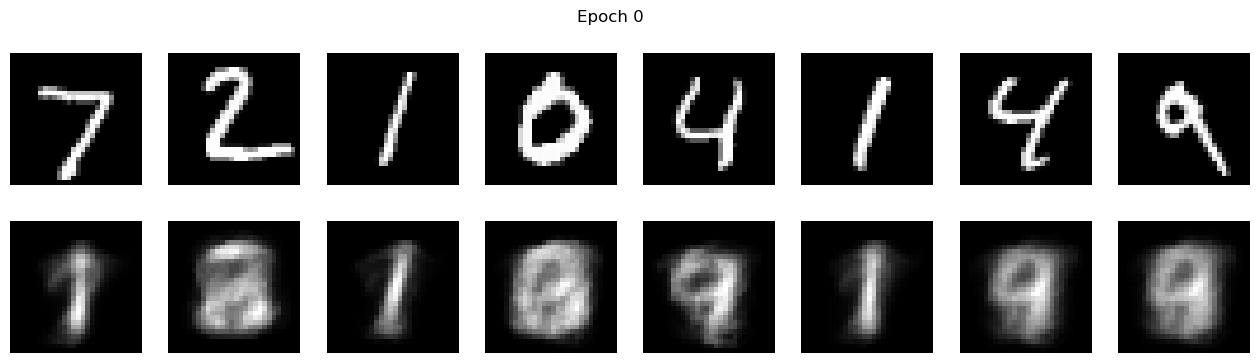

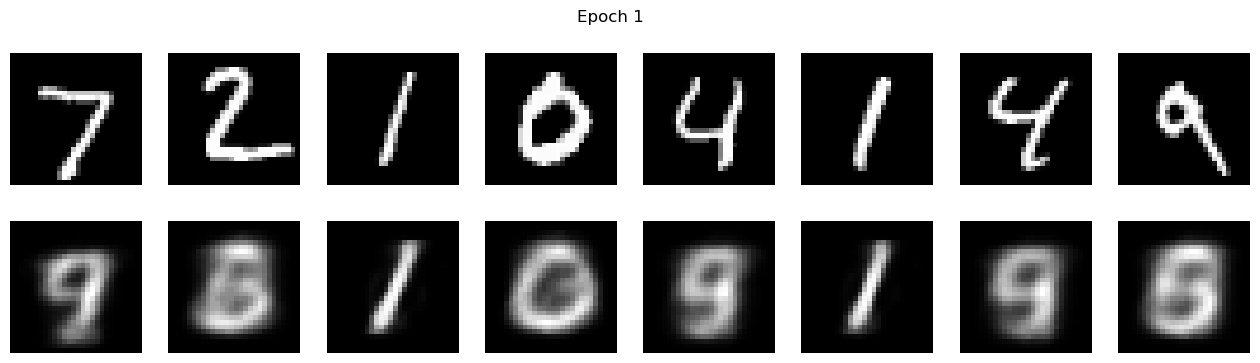

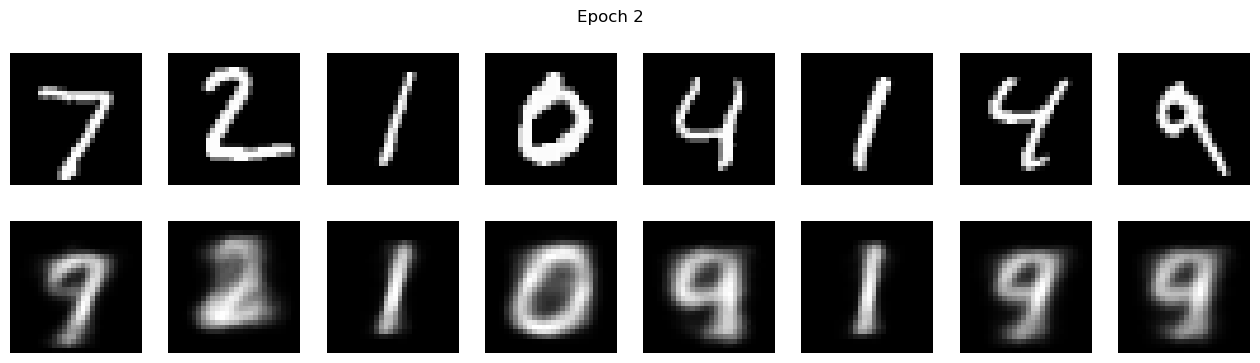

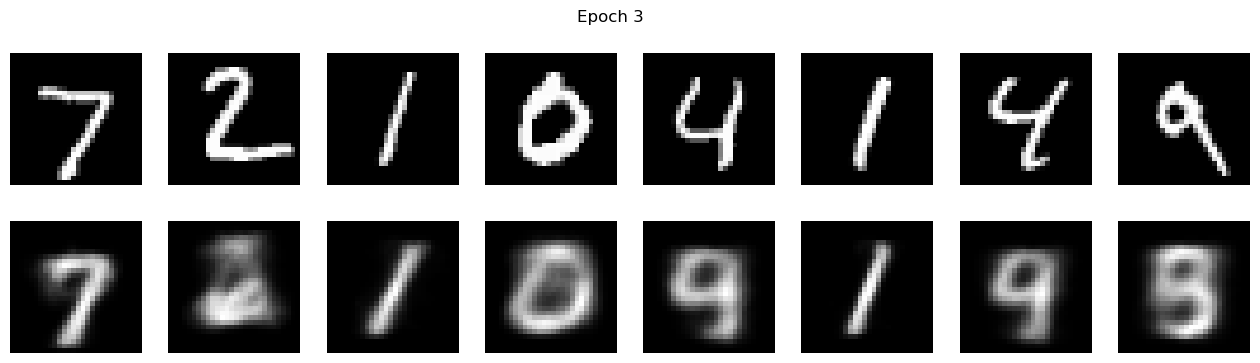

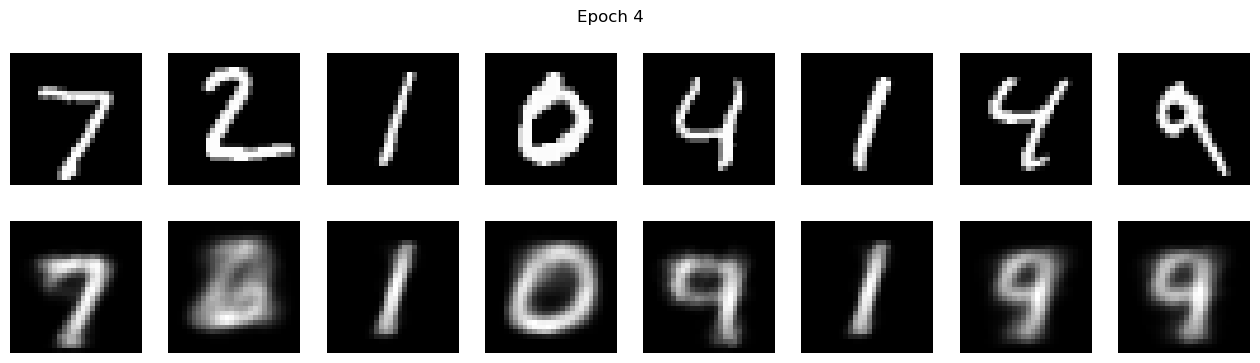

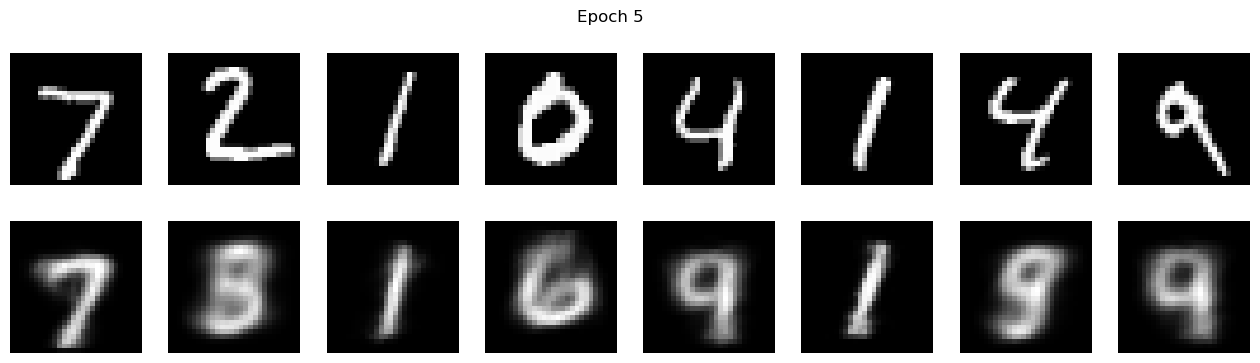

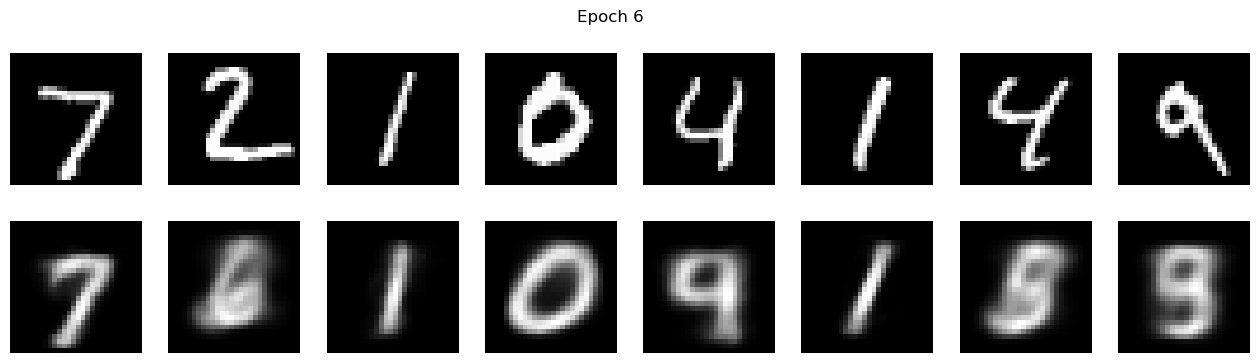

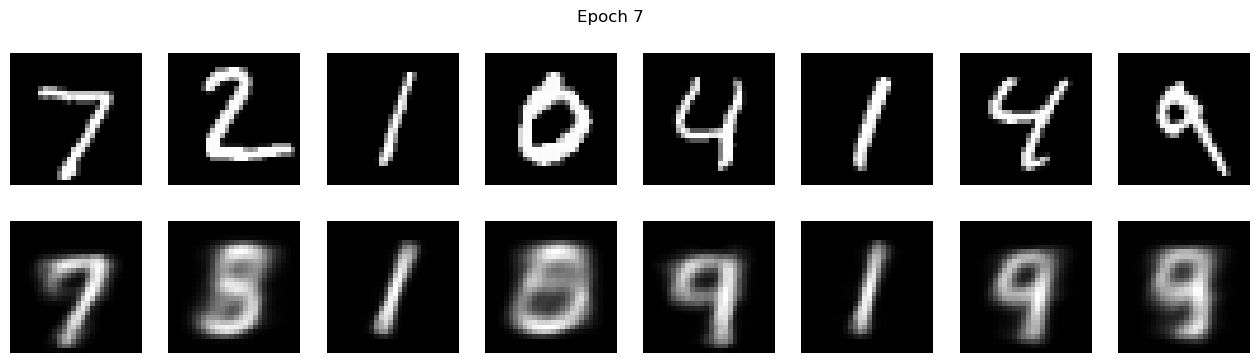

In [6]:
NUM_EPOCHS = 8
for epoch in range(NUM_EPOCHS):
  model = train(model, train_dataloader, criterion, optimizer, epoch)
  plot_results(model, test_dataloader, epoch)

Taking closer look at the latent space

In [19]:
encoded_space = []
labels = []

for image, label in val_dataloader:
  image = image.to(device).view(-1, 784)
  output, _, __ = model.encode(image)
  encoded_space.extend(output.detach().cpu().numpy())
  labels.extend(label.detach().cpu().numpy())

In [20]:
encoded_space = np.array(encoded_space).reshape(np.array(encoded_space).shape[0], 2)

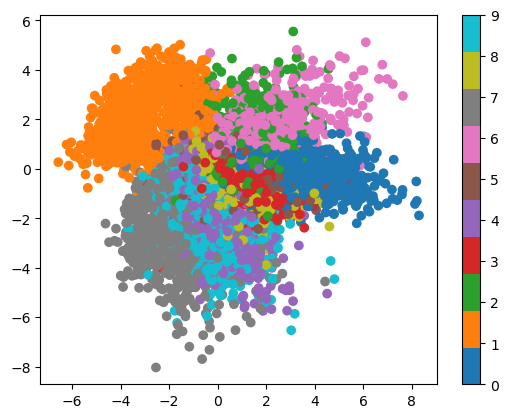

In [21]:
plt.scatter(x=encoded_space[:, 0], y=encoded_space[:, 1], c=labels,cmap='tab10')
plt.colorbar()